In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

In [ ]:
    def create_overlay_and_blend(image, mask, class_colors, gamma, alpha=0.5):
        
        overlay = np.zeros_like(image, dtype=np.uint8)

        # Color only class regions (excluding background)
        for class_id, color in class_colors.items():
            if class_id == 0:
                continue  # Skip background
            class_mask = (mask == class_id)
            overlay[class_mask] = color

        # Create a mask where any class ≠ 0
        object_mask = (mask != 0)

        # Blend only the object region
        blended_image = image.copy()

        blended_image[object_mask] = cv2.addWeighted(
            image[object_mask], 1 - alpha, overlay[object_mask], alpha, gamma
        )
        
        # blended_image[object_mask] = (
        #     image[object_mask] * (1 - alpha) + overlay[object_mask] * alpha
        # ).astype(np.uint8)
        
        return blended_image, overlay


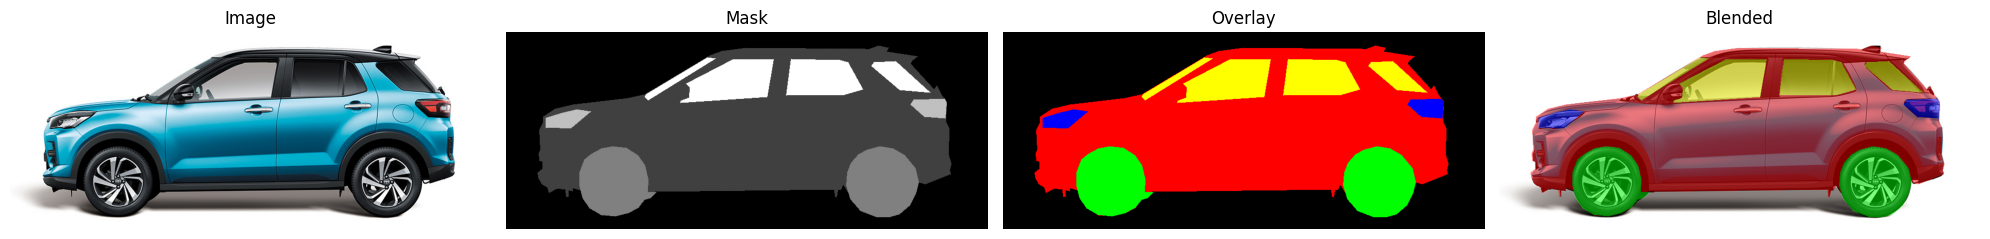

In [19]:
# Directories
images_dir = "Multiple_Classes/images"
images_mask = "Multiple_Classes/masks"
images = os.listdir(images_dir)

# Create a grid for visualization
fig, ax = plt.subplots(1, 4, figsize=(20, 18))
ax = ax.ravel()

class_colors = {
    0: [0, 0, 0],         # Background (black)
    1: [255, 0, 0],       #  (red)
    2: [0, 255, 0],       # Wheel (green)
    3: [0, 0, 255],       # Lights (blue)
    4: [255, 255, 0],     # Window (yellow)
}

for i in range(1):

    img = images[i]
    img_path = os.path.join(images_dir, img)
    mask_path = os.path.join(images_mask, f"{img[:-4]}.png")
    
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  
    mask = cv2.imread(mask_path, 0)

    blended_image, overlay = create_overlay_and_blend(image, mask, class_colors, 0, 0.5)
    # blended_image_02, overlay = create_overlay_and_blend(image, mask, class_colors, 30, 0.5)
    # blended_image_03, overlay = create_overlay_and_blend(image, mask, class_colors, 60, 0.5)
    # blended_image_04, overlay = create_overlay_and_blend(image, mask, class_colors, 90, 0.5)

    # Plot in row i (4 columns)
    ax[i*4 + 0].imshow(image)
    ax[i*4 + 0].set_title("Image")
    ax[i*4 + 0].axis("off")

    ax[i*4 + 1].imshow(mask, cmap='gray')
    ax[i*4 + 1].set_title("Mask")
    ax[i*4 + 1].axis("off")

    ax[i*4 + 2].imshow(overlay)
    ax[i*4 + 2].set_title("Overlay")
    ax[i*4 + 2].axis("off")

    ax[i*4 + 3].imshow(blended_image)
    ax[i*4 + 3].set_title("Blended")
    ax[i*4 + 3].axis("off")

plt.tight_layout()
plt.show()
